In [2]:
import warnings
import pandas as pd
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm, probplot, pearsonr, power_divergence
warnings.filterwarnings("ignore")
import seaborn as sns
import plotly.express as px

In [3]:
dados_cr7 = pd.read_csv('cr7.csv')
dados_messi = pd.read_csv('messi.csv')
data = pd.read_csv('data.csv')

In [4]:
dados_cr7.head(5)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


In [5]:
dados_messi.head(5)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho


In [ ]:
data

In [194]:
per_season = dados_messi.groupby('Season').Opponent
per_competition = dados_messi.groupby('Competition').Opponent
per_type = dados_messi.groupby('Type').Opponent
per_opponent = dados_messi.groupby('Opponent').Season

per_position = dados_messi.groupby('Playing_Position').Opponent
per_assist = dados_messi.groupby('Goal_assist').Opponent
per_club = dados_messi.groupby('Club').Opponent
per_final_result = dados_messi.groupby('Result').Opponent
per_score_moment = dados_messi.groupby('At_score').Opponent
per_venue = dados_messi.groupby('Venue').Opponent


per_season = pd.DataFrame(per_season)
per_competition = pd.DataFrame(per_competition)
per_type = pd.DataFrame(per_type)
per_opponent = pd.DataFrame(per_opponent)

per_position = pd.DataFrame(per_position)
per_assist = pd.DataFrame(per_assist)
per_club = pd.DataFrame(per_club)
per_final_result = pd.DataFrame(per_final_result)
per_score_moment = pd.DataFrame(per_score_moment)
per_venue = pd.DataFrame(per_venue)

per_season['Gols'] = len(per_season[1][0])
per_competition['Gols'] = len(per_competition[1][0])
per_type['Gols'] = len(per_type[1][0])
per_opponent['Gols'] = len(per_season[1][0])

per_position['Gols'] = len(per_position[1][0])
per_assist['Gols'] = len(per_assist[1][0])
per_club['Gols'] = len(per_club[1][0])
per_final_result['Gols'] = len(per_final_result[1][0])
per_score_moment['Gols'] = len(per_score_moment[1][0])
per_venue['Gols'] = len(per_venue[1][0])


for i in range(len(per_season[0])):
    per_season['Gols'][i] = len(per_season[1][i])

for i in range(len(per_competition[0])):
    per_competition['Gols'][i] = len(per_competition[1][i])

for i in range(len(per_type[0])):
    per_type['Gols'][i] = len(per_type[1][i])

for i in range(len(per_opponent[0])):
    per_opponent['Gols'][i] = len(per_opponent[1][i])



for i in range(len(per_position[0])):
    per_position['Gols'][i] = len(per_position[1][i])

for i in range(len(per_assist[0])):
    per_assist['Gols'][i] = len(per_assist[1][i])

for i in range(len(per_club[0])):
    per_club['Gols'][i] = len(per_club[1][i])

for i in range(len(per_final_result[0])):
    per_final_result['Gols'][i] = len(per_final_result[1][i])

for i in range(len(per_score_moment[0])):
    per_score_moment['Gols'][i] = len(per_score_moment[1][i])

for i in range(len(per_venue[0])):
    per_venue['Gols'][i] = len(per_venue[1][i])



per_season[0][7] = '11/12'
per_season[0][18] = '12/13'
per_season = per_season.rename(columns = {0: 'Season', 1: 'Opponents'}).sort_values(by='Season')
per_season = per_season.drop(['Opponents'], axis=1)


per_competition.rename(columns = {0: 'Competition', 1: 'Opponents'}, inplace=True)
per_competition.sort_values(by='Gols',ascending= False, inplace=True)
per_competition.reset_index(inplace=True)
per_competition['Gols'][1] = 129
per_competition.drop(['Opponents'], axis=1, inplace = True)
per_competition.drop(['index'], axis=1, inplace = True)
per_competition.drop([7,9],axis=0, inplace= True)
per_competition.reset_index(inplace=True)
per_competition.drop(['index'], axis=1, inplace = True)


per_type = per_type.rename(columns = {0: 'Type', 1: 'Opponents'}).sort_values(by='Gols',ascending= False)
per_type = per_type.drop(['Opponents'], axis=1)


per_opponent = per_opponent.rename(columns = {0: 'Opponent', 1: 'Seasons'}).sort_values(by='Gols',ascending= False)
per_opponent = per_opponent.drop(['Seasons'], axis=1)

per_position = per_position.rename(columns = {0: 'Position', 1: 'Opponents'}).sort_values(by='Gols',ascending= False)
per_position = per_position.drop(['Opponents'], axis=1)

per_assist = per_assist.rename(columns = {0: 'Assist', 1: 'Opponents'}).sort_values(by='Gols',ascending= False)
per_assist = per_assist.drop(['Opponents'], axis=1)

per_club = per_club.rename(columns = {0: 'Club', 1: 'Opponents'}).sort_values(by='Gols',ascending= False)
per_club = per_club.drop(['Opponents'], axis=1)

per_final_result = per_final_result.rename(columns = {0: 'Result', 1: 'Opponents'}).sort_values(by='Gols',ascending= False)
per_final_result = per_final_result.drop(['Opponents'], axis=1)

per_score_moment = per_score_moment.rename(columns = {0: 'At_score', 1: 'Opponents'}).sort_values(by='Gols',ascending= False)
per_score_moment = per_score_moment.drop(['Opponents'], axis=1)

per_venue = per_venue.rename(columns = {0: 'Venue', 1: 'Opponents'}).sort_values(by='Gols',ascending= False)
per_venue = per_venue.drop(['Opponents'], axis=1)




display(per_season)
display(per_competition)
display(per_type)
display(per_opponent)

display(per_position)
display(per_assist)
display(per_club)
display(per_final_result)
display(per_score_moment)
display(per_venue)


    

,Season,Gols
0,04/05,1
1,05/06,8
2,06/07,17
3,07/08,16
4,08/09,38
5,09/10,47
6,10/11,53
7,11/12,73
18,12/13,60
8,13/14,41


,Competition,Gols
0,LaLiga,474
1,UEFA Champions League,129
2,Copa del Rey,56
3,Ligue 1,15
4,Supercopa,14
5,FIFA Club World Cup,5
6,UEFA Super Cup,3
7,Trophée des Champions,1


,Type,Gols
5,Left-footed shot,433
7,Penalty,84
9,Right-footed shot,84
3,Direct free kick,51
4,Header,24
11,Tap-in,9
10,Solo run,4
8,Penalty rebound,3
2,Deflected shot on goal,2
0,Chest,1


,Opponent,Gols
83,Sevilla FC,38
8,Atletico de Madrid,32
91,Valencia CF,31
7,Athletic Bilbao,29
71,Real Madrid,26
...,...,...
40,FC Porto,1
42,Ferencvarosi TC,1
68,Rangers FC,1
64,RC Lens,1


,Position,Gols
2,CF,273
5,RW,221
6,RW,95
3,CF,40
8,SS,32
7,SS,21
0,AM,8
1,AM,7
4,LW,1


,Assist,Gols
35,Luis Suarez,48
15,Dani Alves,42
5,Andres Iniesta,39
63,Xavi,34
44,Neymar,30
...,...,...
43,Nelson Semedo,1
42,Munir El Haddadi,1
41,Maxwell,1
40,Martin Braithwaite,1


,Club,Gols
0,FC Barcelona,672
1,Paris Saint-Germain,26


,Result,Gols
32,4:00,47
27,3:00,43
39,5:00,42
28,3:01,38
33,4:01,35
1,0:02,35
40,5:01,32
11,1:02,30
21,2:02,29
3,0:04,27


,At_score,Gols
10,1:00,98
17,2:00,81
0,0:01,70
1,0:02,57
24,3:00,49
11,1:01,48
18,2:01,37
12,1:02,29
30,4:00,29
25,3:01,27


,Venue,Gols
1,H,416
0,A,282


In [212]:
per_position1 = pd.DataFrame(per_position.groupby('Position').Gols.sum())
per_position1.reset_index(inplace=True)
display(per_position1)

per_position1['Gols'][0] += int(per_position1['Gols'][1])
per_position1['Gols'][2] += int(per_position1['Gols'][3])
per_position1['Gols'][5] += int(per_position1['Gols'][6])
per_position1['Gols'][7] += int(per_position1['Gols'][8])
per_position1.drop([1,3,6,8], inplace=True)
per_position1.reset_index(inplace=True)

per_position1.drop('index',axis=1, inplace=True)

display(per_position1)


,Position,Gols
0,AM,8
1,AM,7
2,CF,273
3,CF,40
4,LW,1
5,RW,221
6,RW,95
7,SS,21
8,SS,32


,Position,Gols
0,AM,15
1,CF,313
2,LW,1
3,RW,316
4,SS,53


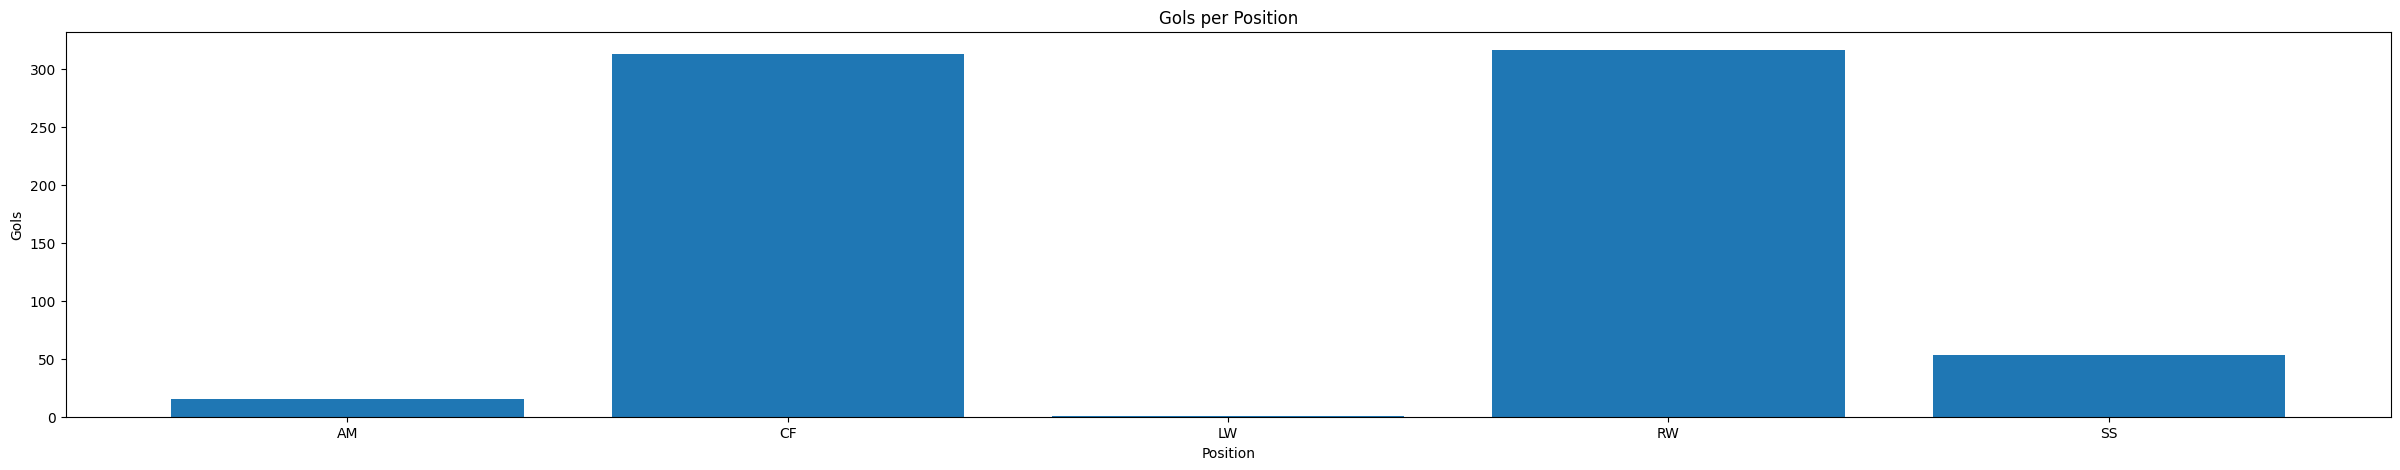

In [210]:
#ordem Cronológica
x = per_position1['Position']
y = per_position1['Gols']

plt.figure(figsize = (30,5))
plt.title('Gols per Position')
plt.xlabel('Position')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


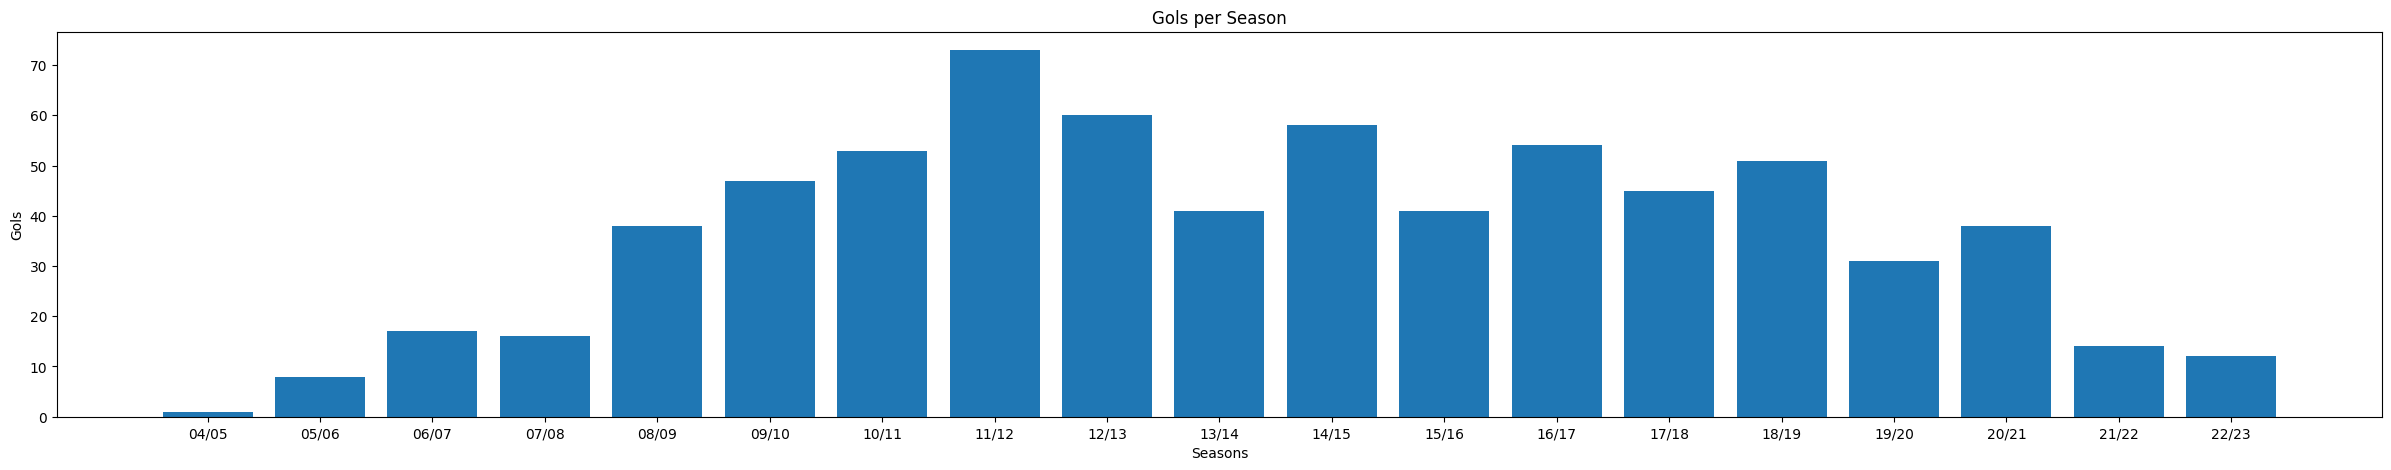

In [161]:
#ordem Cronológica
x = per_season['Season'].to_numpy()
y = per_season['Gols'].to_numpy()
plt.figure(figsize = (30,5))
plt.title('Gols per Season')
plt.xlabel('Seasons')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


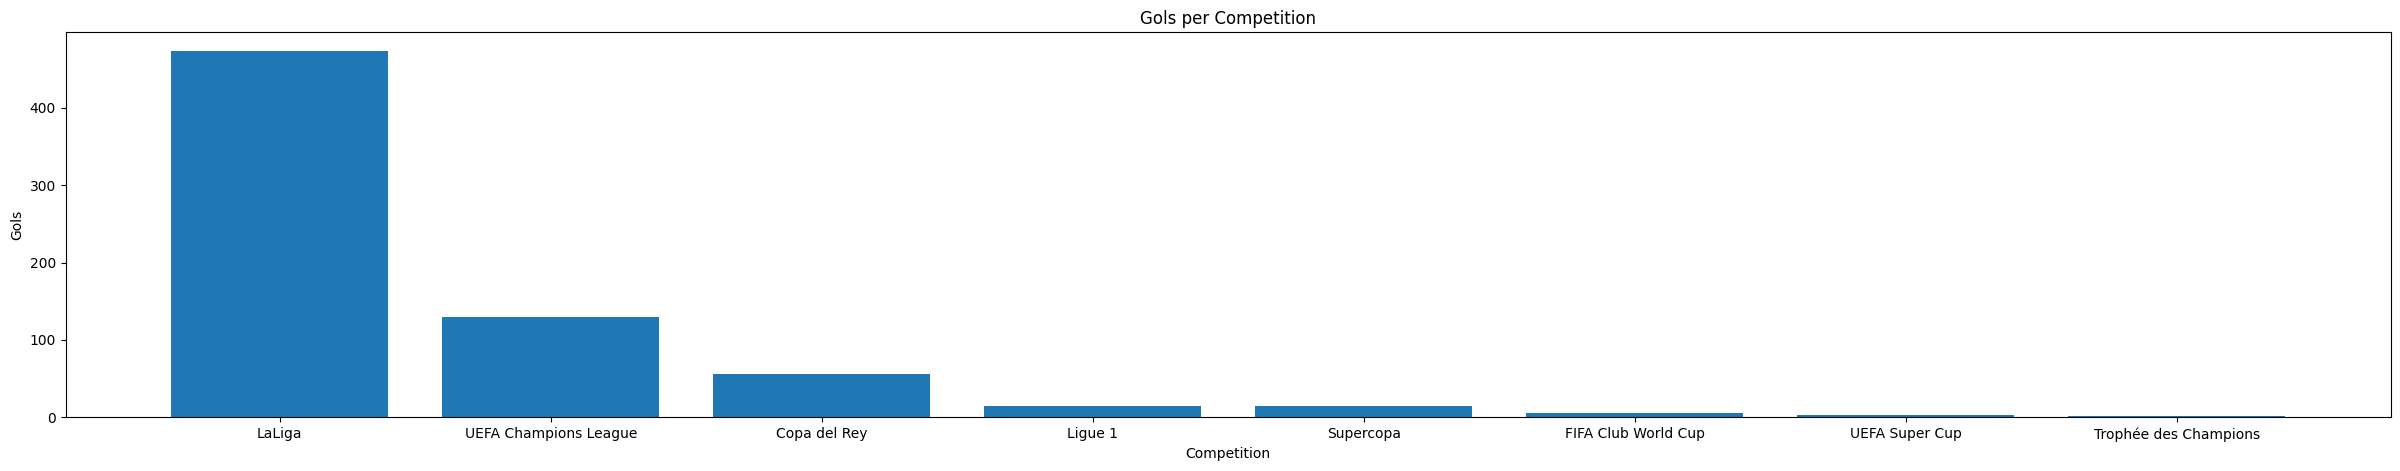

In [163]:
#ordem Cronológica
x = per_competition['Competition'].to_numpy()
y = per_competition['Gols'].to_numpy()
plt.figure(figsize = (30,5))
plt.title('Gols per Competition')
plt.xlabel('Competition')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


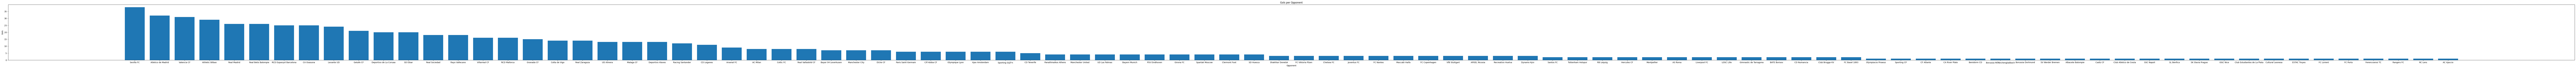

In [168]:
#ordem Cronológica
x = per_opponent['Opponent'].to_numpy()
y = per_opponent['Gols'].to_numpy()
plt.figure(figsize = (230,5))
plt.title('Gols per Opponent')
plt.xlabel('Opponent')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


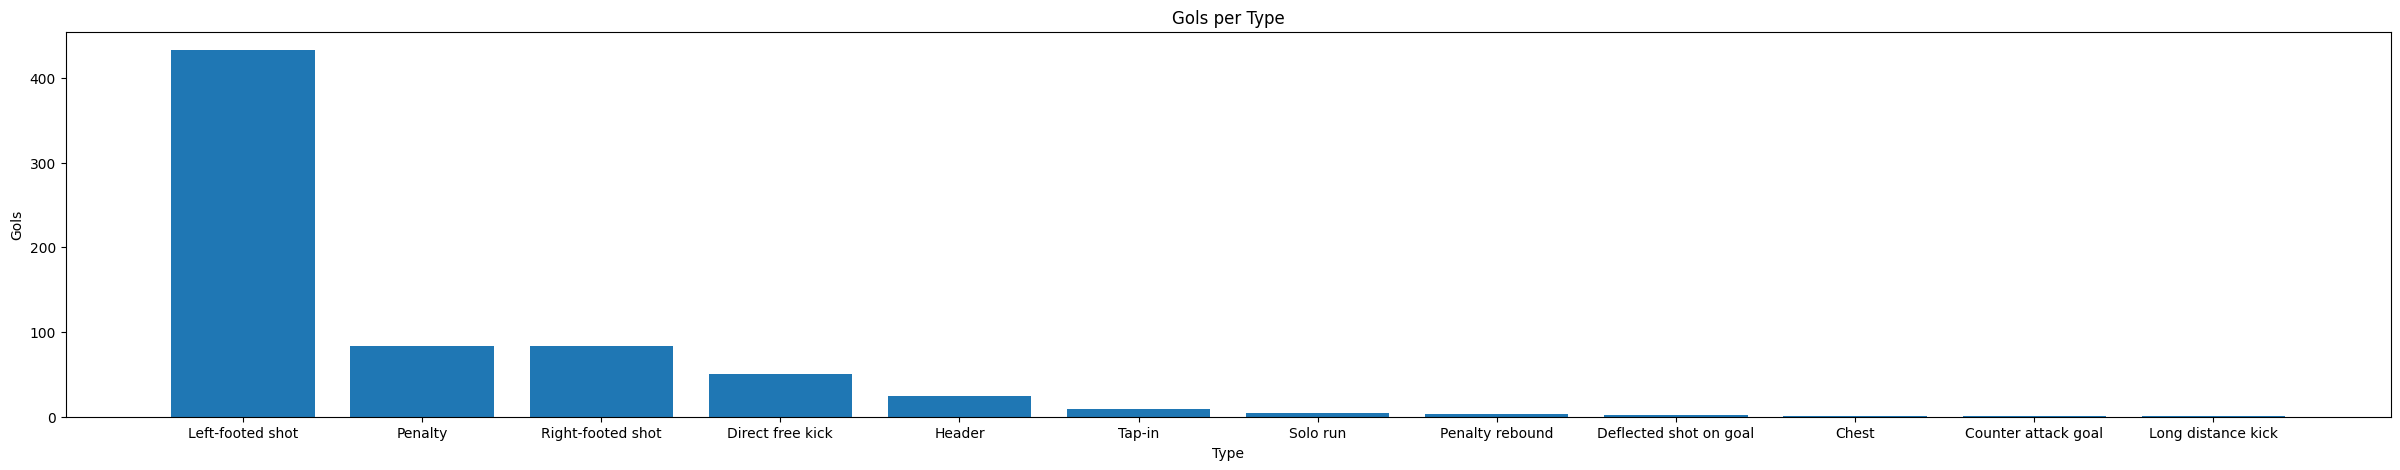

In [170]:
#ordem Cronológica
x = per_type['Type'].to_numpy()
y = per_type['Gols'].to_numpy()
plt.figure(figsize = (30,5))
plt.title('Gols per Type')
plt.xlabel('Type')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()
